## Частина 1

- В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, 
яка буде класифікувати товари із датасету fasion_mnist.
На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. 
Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. 
Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. 


У попередньому завданні, спершу я випадково зразу використала згортковий шар. Повернемось до цієї моделі. 

Epoch 1/20
94/94 [==============================] - 5s 48ms/step - loss: 0.6029 - accuracy: 0.7930 - val_loss: 0.4063 - val_accuracy: 0.8574
Epoch 2/20
94/94 [==============================] - 4s 45ms/step - loss: 0.3712 - accuracy: 0.8709 - val_loss: 0.3631 - val_accuracy: 0.8750
Epoch 3/20
94/94 [==============================] - 4s 43ms/step - loss: 0.3164 - accuracy: 0.8902 - val_loss: 0.3170 - val_accuracy: 0.8905
Epoch 4/20
94/94 [==============================] - 4s 43ms/step - loss: 0.2842 - accuracy: 0.8991 - val_loss: 0.3180 - val_accuracy: 0.8888
Epoch 5/20
94/94 [==============================] - 4s 43ms/step - loss: 0.2608 - accuracy: 0.9076 - val_loss: 0.2889 - val_accuracy: 0.8988
Epoch 6/20
94/94 [==============================] - 4s 44ms/step - loss: 0.2408 - accuracy: 0.9144 - val_loss: 0.2828 - val_accuracy: 0.9007
Epoch 7/20
94/94 [==============================] - 4s 44ms/step - loss: 0.2253 - accuracy: 0.9199 - val_loss: 0.2780 - val_accuracy: 0.9035
Epoch 8/20
94

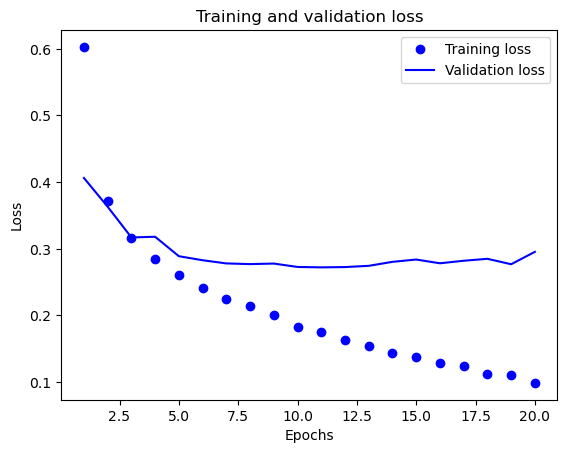

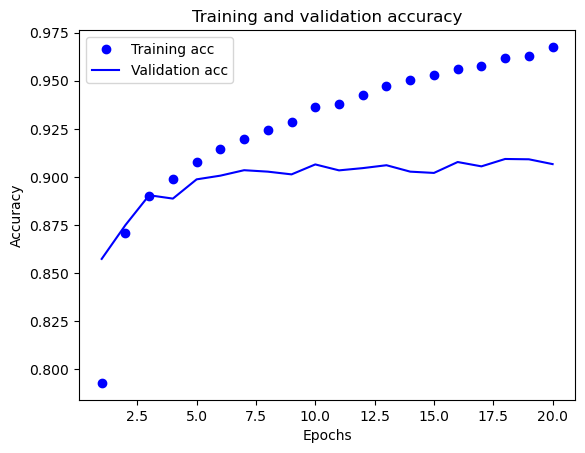

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import VGG16

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize, grayscale_to_rgb



# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



# Створення моделі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))



# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



# Навчання моделі
history = model.fit(
    train_images, train_labels, epochs=20, batch_size=512, validation_split=0.2
)



# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)


print(f"Test accuracy: {test_acc}")

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(history_dict["accuracy"]) + 1)



plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# plt.clf()
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Порівняно з конспектом, у мене бракує ще декількох шарів.
Не зважаючи на це, ми бачимо у порівнянні з попереднім завданням, що додавання всього одного шару суттєво зменшило кількість діб і спростило модель, при цьому суттєво збільшивши точність. 

Тепер додамо більше шарів і подивимось на результат.

In [ ]:
def build(model):
    # Компіляція моделі
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Навчання моделі
    history = model.fit(
        train_images, train_labels, epochs=20, batch_size=512, validation_split=0.2
    )

    # Оцінка моделі на тестових даних
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_acc}")

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(history_dict["accuracy"]) + 1)

    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # plt.clf()
    val_acc_values = history_dict["val_accuracy"]
    plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
    plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

Epoch 1/20
94/94 [==============================] - 8s 78ms/step - loss: 0.9589 - accuracy: 0.6550 - val_loss: 0.6033 - val_accuracy: 0.7751
Epoch 2/20
94/94 [==============================] - 8s 81ms/step - loss: 0.5212 - accuracy: 0.8064 - val_loss: 0.4742 - val_accuracy: 0.8294
Epoch 3/20
94/94 [==============================] - 7s 78ms/step - loss: 0.4415 - accuracy: 0.8394 - val_loss: 0.4144 - val_accuracy: 0.8541
Epoch 4/20
94/94 [==============================] - 8s 82ms/step - loss: 0.3900 - accuracy: 0.8600 - val_loss: 0.4027 - val_accuracy: 0.8512
Epoch 5/20
94/94 [==============================] - 7s 77ms/step - loss: 0.3597 - accuracy: 0.8717 - val_loss: 0.3508 - val_accuracy: 0.8757
Epoch 6/20
94/94 [==============================] - 7s 75ms/step - loss: 0.3334 - accuracy: 0.8799 - val_loss: 0.3427 - val_accuracy: 0.8775
Epoch 7/20
94/94 [==============================] - 7s 76ms/step - loss: 0.3187 - accuracy: 0.8848 - val_loss: 0.3451 - val_accuracy: 0.8735
Epoch 8/20
94

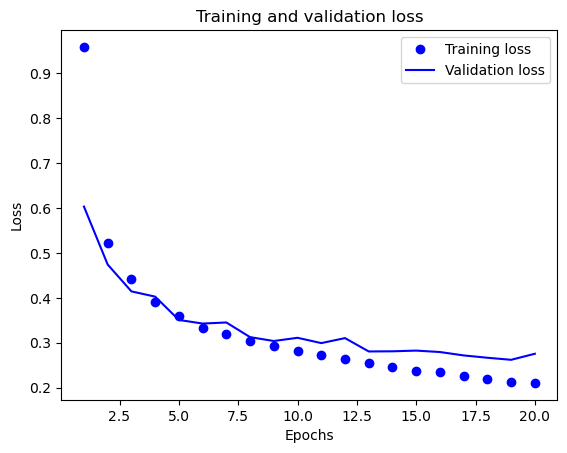

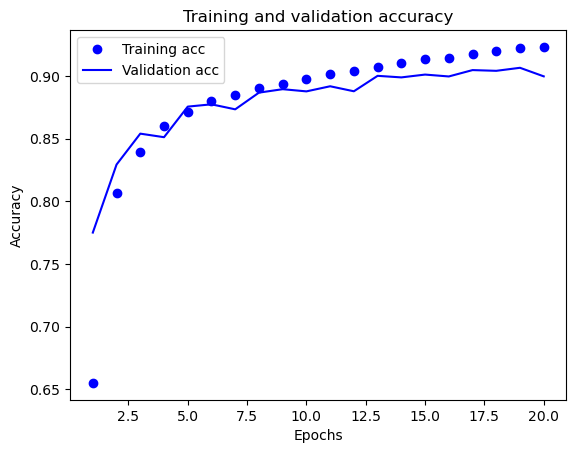

In [ ]:
# Створення моделі
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

build(model)
model.summary()

Бачимо, що точність впала.

Збільшимо кількість нейронів.

Epoch 1/20
94/94 [==============================] - 26s 251ms/step - loss: 0.8520 - accuracy: 0.6949 - val_loss: 0.5320 - val_accuracy: 0.7989
Epoch 2/20
94/94 [==============================] - 19s 205ms/step - loss: 0.4662 - accuracy: 0.8295 - val_loss: 0.4246 - val_accuracy: 0.8432
Epoch 3/20
94/94 [==============================] - 19s 205ms/step - loss: 0.3820 - accuracy: 0.8614 - val_loss: 0.3687 - val_accuracy: 0.8711
Epoch 4/20
94/94 [==============================] - 19s 204ms/step - loss: 0.3402 - accuracy: 0.8767 - val_loss: 0.3333 - val_accuracy: 0.8818
Epoch 5/20
94/94 [==============================] - 20s 212ms/step - loss: 0.3072 - accuracy: 0.8889 - val_loss: 0.3244 - val_accuracy: 0.8832
Epoch 6/20
94/94 [==============================] - 20s 213ms/step - loss: 0.2927 - accuracy: 0.8936 - val_loss: 0.3127 - val_accuracy: 0.8899
Epoch 7/20
94/94 [==============================] - 20s 214ms/step - loss: 0.2725 - accuracy: 0.9017 - val_loss: 0.2914 - val_accuracy: 0.8962

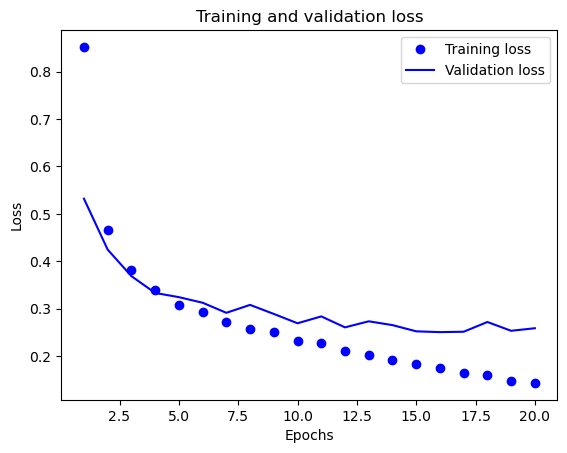

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 128)         147584    
                                                                 
 flatten_8 (Flatten)         (None, 1152)             

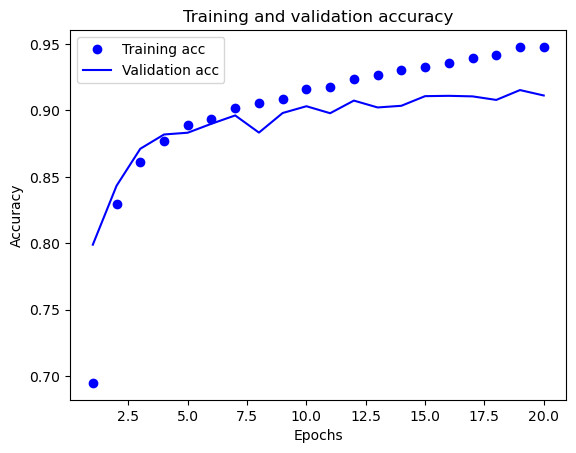

In [ ]:
# Створення моделі
model = models.Sequential(
    [
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

build(model)
model.summary()

Збільшення кількості фільтрів допомогло, збільшемо кількість діб, бетч та регуляризацію.

Epoch 1/30
188/188 [==============================] - 21s 107ms/step - loss: 5.2495 - accuracy: 0.5479 - val_loss: 0.4706 - val_accuracy: 0.8289
Epoch 2/30
188/188 [==============================] - 21s 110ms/step - loss: 5.0587 - accuracy: 0.6159 - val_loss: 0.3968 - val_accuracy: 0.8523
Epoch 3/30
188/188 [==============================] - 22s 116ms/step - loss: 5.0311 - accuracy: 0.6288 - val_loss: 0.3530 - val_accuracy: 0.8715
Epoch 4/30
188/188 [==============================] - 22s 119ms/step - loss: nan - accuracy: 0.6354 - val_loss: 0.3390 - val_accuracy: 0.8786
Epoch 5/30
188/188 [==============================] - 22s 115ms/step - loss: 4.9615 - accuracy: 0.6439 - val_loss: 0.3269 - val_accuracy: 0.8826
Epoch 6/30
188/188 [==============================] - 20s 109ms/step - loss: 4.9925 - accuracy: 0.6444 - val_loss: 0.2932 - val_accuracy: 0.8937
Epoch 7/30
188/188 [==============================] - 20s 104ms/step - loss: 4.9265 - accuracy: 0.6506 - val_loss: 0.2837 - val_accur

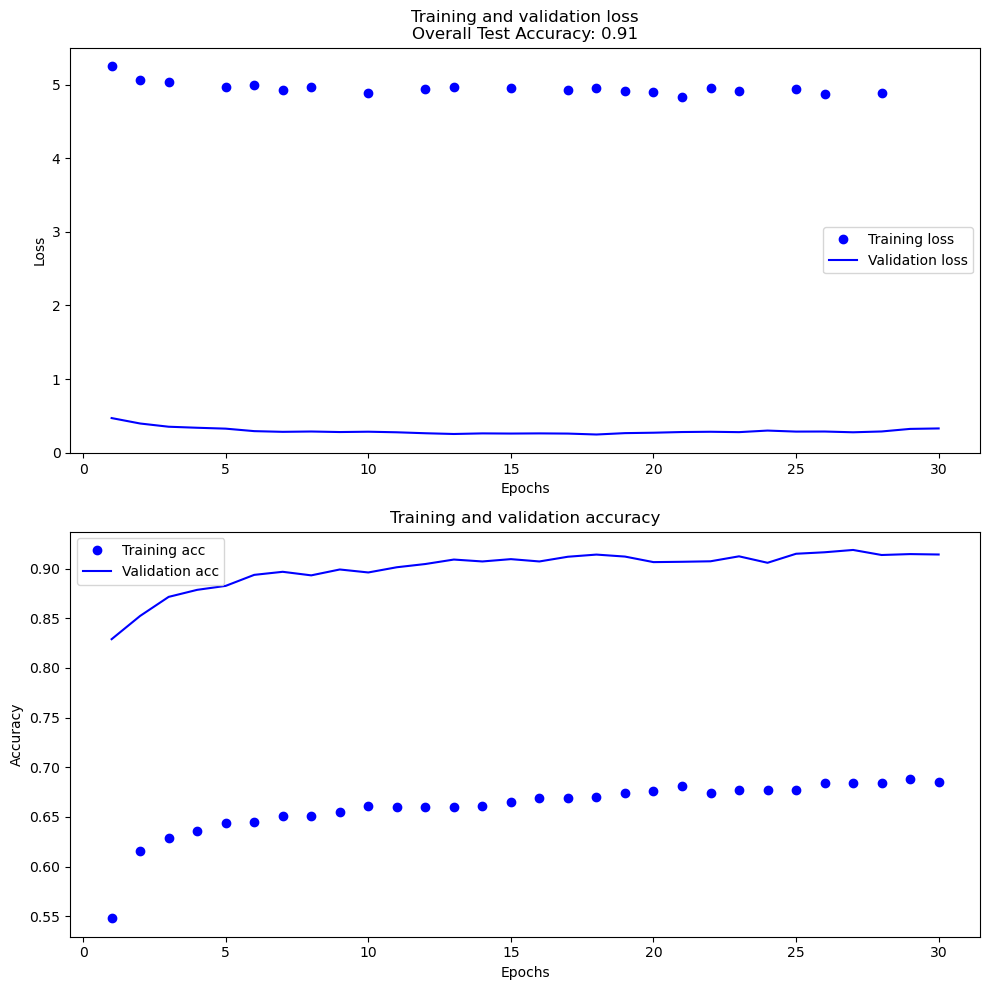

In [ ]:
best = {
    "epochs": 30,
    "batch_size": 256,
    "optimizer": "adam",
    "regularization": {"type": "dropout", "rate": 0.3},
}

def train_and_evaluate_model(epochs, batch_size, optimizer, regularization=None):

    model = models.Sequential(
        [
            layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )

    # Apply regularization if specified
    if regularization:
        if regularization['type'] == 'dropout':
            model.add(layers.Dropout(regularization['rate']))
        elif regularization['type'] == 'l2':
            model.add(layers.ActivityRegularization(l2=regularization['l2']))

    # Compiling the model
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    # Training the model
    history = model.fit(
        train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2
    )

    # Evaluating the model on test data
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_acc}")

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs_range = range(1, len(history_dict["accuracy"]) + 1)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot for Training and Validation Loss
    axs[0].plot(epochs_range, loss_values, "bo", label="Training loss")
    axs[0].plot(epochs_range, val_loss_values, "b", label="Validation loss")
    axs[0].set_title(f"Training and validation loss\nOverall Test Accuracy: {test_acc:.2f}")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    # Plot for Training and Validation Accuracy
    val_acc_values = history_dict["val_accuracy"]
    axs[1].plot(epochs_range, history_dict["accuracy"], "bo", label="Training acc")
    axs[1].plot(epochs_range, val_acc_values, "b", label="Validation acc")
    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

train_and_evaluate_model(**best)

Ми отримали впевнені 91%. 
Що цікаво, валідаційна точність сильно перевищує тренувальну точність і повільно але впевнено росте, тож при дуже великій кількості діб можна було би досягти дуже переконливої точності, мабуть до 94% як мінімум.

## Частина 2

- В цій частині ми знову будемо працювати з датасетом fasion_mnist.
На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.
Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Epoch 1/30
188/188 [==============================] - 94s 490ms/step - loss: nan - accuracy: 0.4393 - val_loss: 1.0769 - val_accuracy: 0.7480
Epoch 2/30
188/188 [==============================] - 91s 483ms/step - loss: 5.3234 - accuracy: 0.5744 - val_loss: 0.6991 - val_accuracy: 0.7977
Epoch 3/30
188/188 [==============================] - 90s 479ms/step - loss: 5.2043 - accuracy: 0.5944 - val_loss: 0.5719 - val_accuracy: 0.8160
Epoch 4/30
188/188 [==============================] - 91s 483ms/step - loss: nan - accuracy: 0.6085 - val_loss: 0.5160 - val_accuracy: 0.8243
Epoch 5/30
188/188 [==============================] - 89s 476ms/step - loss: 5.0823 - accuracy: 0.6146 - val_loss: 0.4754 - val_accuracy: 0.8337
Epoch 6/30
188/188 [==============================] - 91s 484ms/step - loss: nan - accuracy: 0.6135 - val_loss: 0.4598 - val_accuracy: 0.8398
Epoch 7/30
188/188 [==============================] - 89s 476ms/step - loss: 5.0479 - accuracy: 0.6215 - val_loss: 0.4580 - val_accuracy: 0

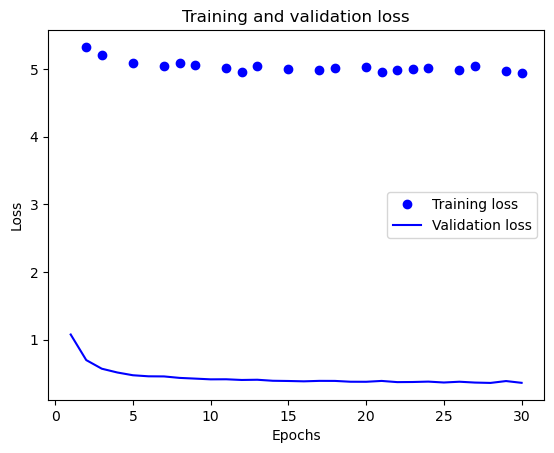

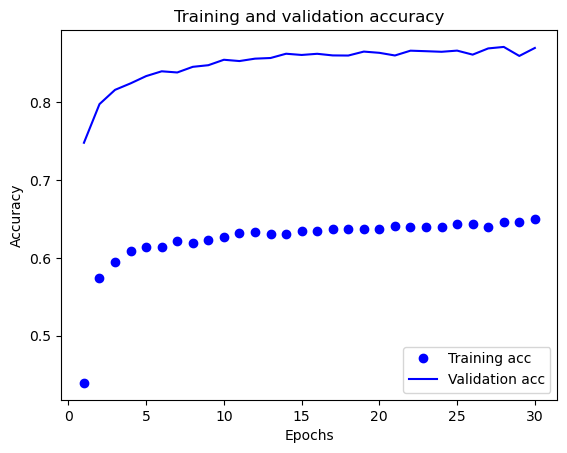

In [37]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = np.stack([train_images] * 3, axis=-1)
test_images = np.stack([test_images] * 3, axis=-1)
train_images = resize(train_images, [32, 32]).numpy()
test_images = resize(test_images, [32, 32]).numpy()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Заморожування згорткової основи

model = models.Sequential(
    [
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(32, activation="sigmoid"),
        layers.Dense(10, activation="softmax"),
        layers.Dropout(0.3),
    ]
)

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(
    train_images, train_labels, epochs=30, batch_size=256, validation_split=0.2
)

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(history_dict["accuracy"]) + 1)


plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# plt.clf()
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [39]:
# Після первинного навчання моделі з замороженою згортковою основою
base_model.trainable = True

fine_tune_at = 50  # розморозка починаючи з 50-го шару
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


model.compile(
    optimizer="adam",  # Зниження швидкості навчання
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


history_fine = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=512,
    validation_data=(test_images, test_labels),
    initial_epoch=history.epoch[-1],
)

# Точність після донавчання
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 22s 70ms/step - loss: 0.3774 - accuracy: 0.8662
Test accuracy: 0.8661999702453613


Бачимо, що донавчання зовсім трошки збільшило точність.

Порівняно з простішою згортковою моделлю, ми можемо бачити сильно меншу точність, хоча на графіку точності видно, що з величезною кількістю діб точність буде тільки зростати (і варто було брати від 100 діб, але мені просто лінь чекати, якщо чесно). 

Я можу пояснити такий результат недостатньою кількістю діб і занадто переускладненою моделлю, як для такого простого датасету, як fashion mnist. 

На інших, більш складних і кольорових прикладах такі величезні мережі матимуть більший сенс. Для fashion mnist достатньо прописати пару згорткових моделей вручну, як зроблено вище, і мати собі 91% і вище, при значно менших розрахункових потужностях. 

Перенавчання не спостерігалось.